In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import SwitchingCoordination as sc
import numpy as np
from tqdm import tqdm

from importlib import reload
reload(sc)
# %load_ext autoreload
# %autoreload 2

<module 'SwitchingCoordination' from 'c:\\Users\\sarap\\OneDrive\\Dokumente\\Studium\\8_SOSE_2023\\switching_coordination\\SwitchingCoordination.py'>

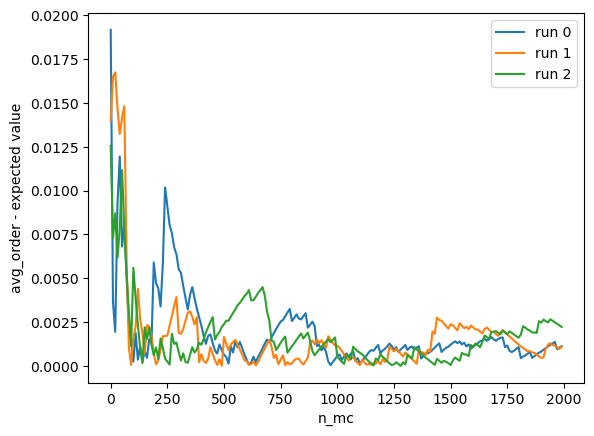

In [36]:
n_mc_reps = 2000

out_data = {}
params = sc.InitParams(N=5, switchingRate=0.3, refTime=1.0)

for g in range(3):
    for mc_iter in np.arange(n_mc_reps):
        
        #perform a single simulation
        out_data_tmp = sc.SingleSimulation(params)
        out_data[mc_iter] = out_data_tmp

    random_sampling_arr = [10]*200
    sample = np.empty(0)
    sample_arr = []
    sample_avg_arr = []
    minvals = []
    maxvals = []

    for i, number in enumerate(random_sampling_arr):
        sample = np.concatenate((sample, np.random.choice(out_data[i]['order'], number)), axis=None)
        sample_avg_arr.append(np.mean(sample))
        minvals.append(np.mean(sample)-np.std(sample))
        maxvals.append(np.mean(sample)+np.std(sample))

    xaxisarr = np.arange(0,2000,10)
    expected = np.mean(sample_avg_arr[-200:])
    avg_error_arr = [abs(expected-x) for x in sample_avg_arr[:]]
    
    plt.plot(xaxisarr,avg_error_arr, label=f'run {g}')

plt.xlabel('n_mc')
plt.ylabel('avg_order - expected value')
plt.legend()
#plt.savefig(f'results/n_mc_2.png', bbox_inches='tight')